<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Samy Alexander Rodríguez Martínez  <br>
Fecha: 19/01/2025

# Importación de librerias necesarias

# Parte I. Regresión

In [ ]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada.

In [ ]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/Samyr0116/Actividad_2_Regresion/refs/heads/main/kc_house_data.csv'
df = pd.read_csv(url)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,lat,long
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,47.6168,-122.045


## Descripción de la fuente del Dataset

Haga una descripción de la fuente de datos utilizada (Incluya los enlaces necesarios).

El conjunto de datos utilizado en este análisis es el conjunto de datos de ventas de viviendas del condado de King, disponible en [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

Este conjunto de datos contiene información sobre viviendas vendidas, incluyendo características como el número de dormitorios, baños, metros cuadrados de espacio habitable, tamaño del lote, número de pisos, condición general de la vivienda, calificación de la vivienda basada en el sistema de calificación del condado de King, superficie habitable por encima del nivel del suelo, superficie del sótano, así como las coordenadas geográficas (latitud y longitud) y el precio de venta.

## Explique el problema a resolver.
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

**Descripción del problema**: El objetivo de este problema es predecir el precio de las viviendas en el condado de King, que incluye la ciudad de Seattle, basándose en características estructurales y de ubicación de las propiedades.

**Tipo de problema**: Este es un caso de aprendizaje supervisado, específicamente un problema de regresión, ya que la variable objetivo (precio) es una variable continua.  

**Variable objetivo**:  
- price

**Variables de entrada**:  
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors  
- condition
- grade
- sqft_above
- sqft_basement
-	lat
- long

**Utilidad de la solución**: La solución a este problema tiene diversas aplicaciones prácticas, tales como:  
- **Evaluación inmobiliaria**: Ayuda a agentes inmobiliarios y compradores a determinar precios justos de mercado para las propiedades.  
- **Planeación urbana**: Facilita la toma de decisiones sobre el desarrollo y distribución de propiedades en diferentes áreas.  
- **Estrategias de inversión**: Asiste a los inversionistas en la evaluación de oportunidades basadas en características clave de las viviendas.  
- **Optimización de diseño**: Proporciona información sobre cuáles características agregan más valor a una vivienda, guiando la remodelación o construcción.  

**Elementos adicionales**:  

**Relaciones a comprobar**:  
- Determinar cómo influyen características como el número de habitaciones, baños y el tamaño del terreno en el precio de la vivienda.
- Identificar si las características no lineales, como el sótano o la condición, tienen un impacto significativo en el precio.
- Comprobar la correlación entre el tamaño habitable y el precio para establecer patrones claros.

**Métodos a utilizar**:
- **Exploración de datos (EDA)**: Analizar correlaciones entre las variables y el precio, visualizando distribuciones y relaciones.
- **Preprocesamiento**: Aplicar técnicas de escalado o normalización para garantizar que todas las variables sean comparables y aptas para el modelado.
- **Modelado predictivo**: Utilizar algoritmos de regresión lineal, Random Forest Regression y redes neuronales para predecir el precio de las viviendas.
- **Evaluación**: Emplear métricas como MAE, RMSE y R² para comparar la efectividad de los modelos y seleccionar el más adecuado.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [ ]:
#Número de instancias en total.
total_instancias = len(df)
print(f"El número total de instancias es: {total_instancias}")

El número total de instancias es: 21613


In [ ]:
# Número de atributos de entrada
atributos = df.drop(columns='price').columns
print(f"Número de atributos de entrada: {len(atributos)}")

Número de atributos de entrada: 11


**Significado de los atributos de entrada:**
- **bedrooms**: número de habitaciones.  
- **bathrooms**: número de baños.  
- **sqft_living**: superficie habitable en pies cuadrados.  
- **sqft_lot**: tamaño del terreno en pies cuadrados.  
- **floors**: número de pisos.  
- **condition**: condición general de la vivienda.  
- **grade**: calificación general asignada a la unidad de vivienda, basada en el sistema de calificación del condado de King.
- **sqft_above**: superficie habitable por encima del nivel del suelo.  
- **sqft_basement**: superficie del sótano.
- **lat**: coordenada de latitud.
- **long**: coordenada de longitud.

In [ ]:
# Tipo de datos de los atributos
print(f"Tipo de datos de los atributos:\n{df.dtypes}")

Tipo de datos de los atributos:
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
lat              float64
long             float64
dtype: object


In [ ]:
# Verificar valores nulos.
print(f"Valores nulos:\n{df.isnull().sum()}")

Valores nulos:
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
lat              0
long             0
dtype: int64


In [ ]:
# Estadísticas de la variable objetivo.
df['price'].describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


In [ ]:
# Estadísticas de los atributos en relación con la variable objetivo.
df.corr()['price'].sort_values(ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
bathrooms,0.525138
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003
floors,0.256794
sqft_lot,0.089661


In [ ]:
# Estadisticas de los datos.
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,7.656873,1788.390691,291.509045,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,1.175459,828.090978,442.575043,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000


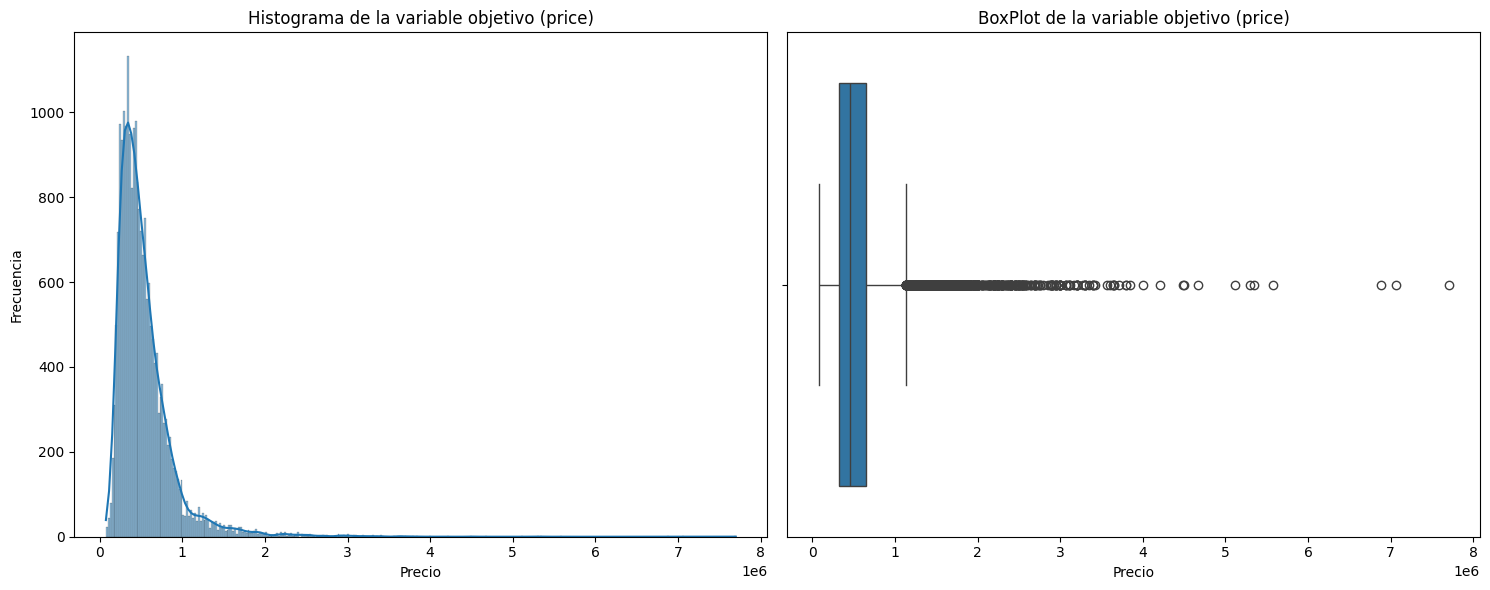

In [ ]:
# Crear una figura con 1 fila y 2 columnas
plt.figure(figsize=(15, 6))

# Primer gráfico: Histograma
plt.subplot(1, 2, 1)
sns.histplot(x='price', data=df, kde=True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable objetivo (price)')

# Segundo gráfico: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.xlabel('Precio')
plt.title('BoxPlot de la variable objetivo (price)')

# Mostrar ambos gráficos
plt.tight_layout()  # Ajusta los gráficos para que no se superpongan
plt.show()

**Observación:** Los gráficos anteriores indican que la distribución de la variable "price" está sesgada hacia la izquierda. La mayoría de los valores se concentran en el extremo inferior, mientras que se observan valores atípicos hacia la derecha, especialmente a partir de 2,000,000.

In [ ]:
# Tratando los valores atípicos.
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

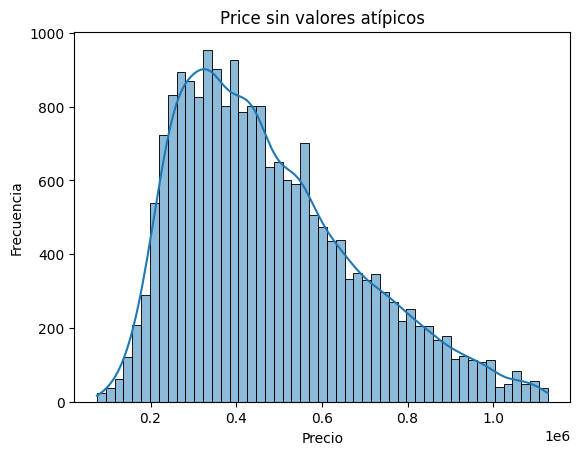

In [ ]:
# Visualizar nuevamente el primer gráfico luego de haber extraído los valores atípicos
sns.histplot(x='price', data=df_clean, kde=True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Price sin valores atípicos')
plt.show()

In [ ]:
# Observando la cantidad de valores eliminados
print(f"Antes: {len(df)}")
print(f"Después: {len(df_clean)}")
print(f"Cantidad de valores eliminados: {len(df) - len(df_clean)}")
print(f"Porcentaje de valores eliminados: {round((len(df) - len(df_clean))/len(df),3)*100}%")

Antes: 21613
Después: 20467
Cantidad de valores eliminados: 1146
Porcentaje de valores eliminados: 5.3%


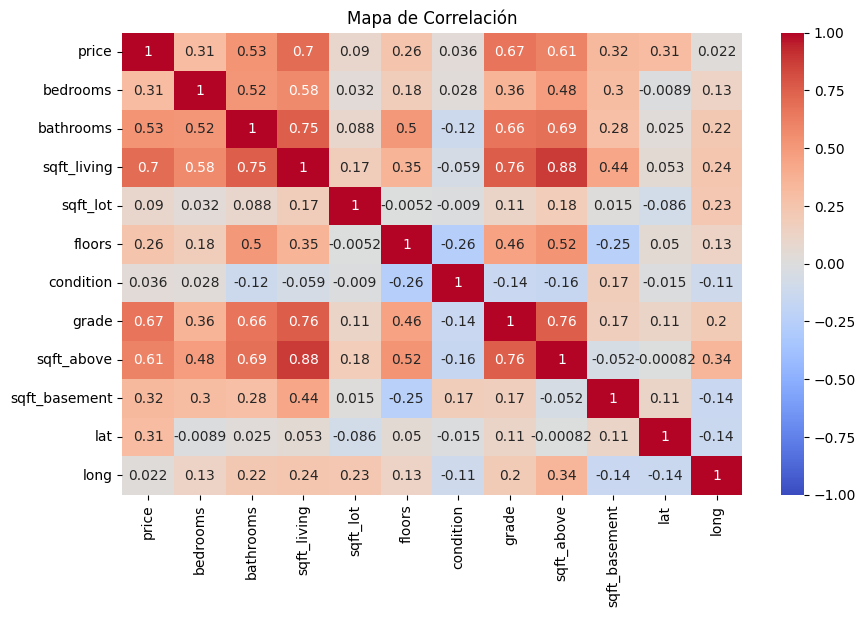

In [ ]:
# Correlación de los atributos
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa de Correlación")
plt.show()

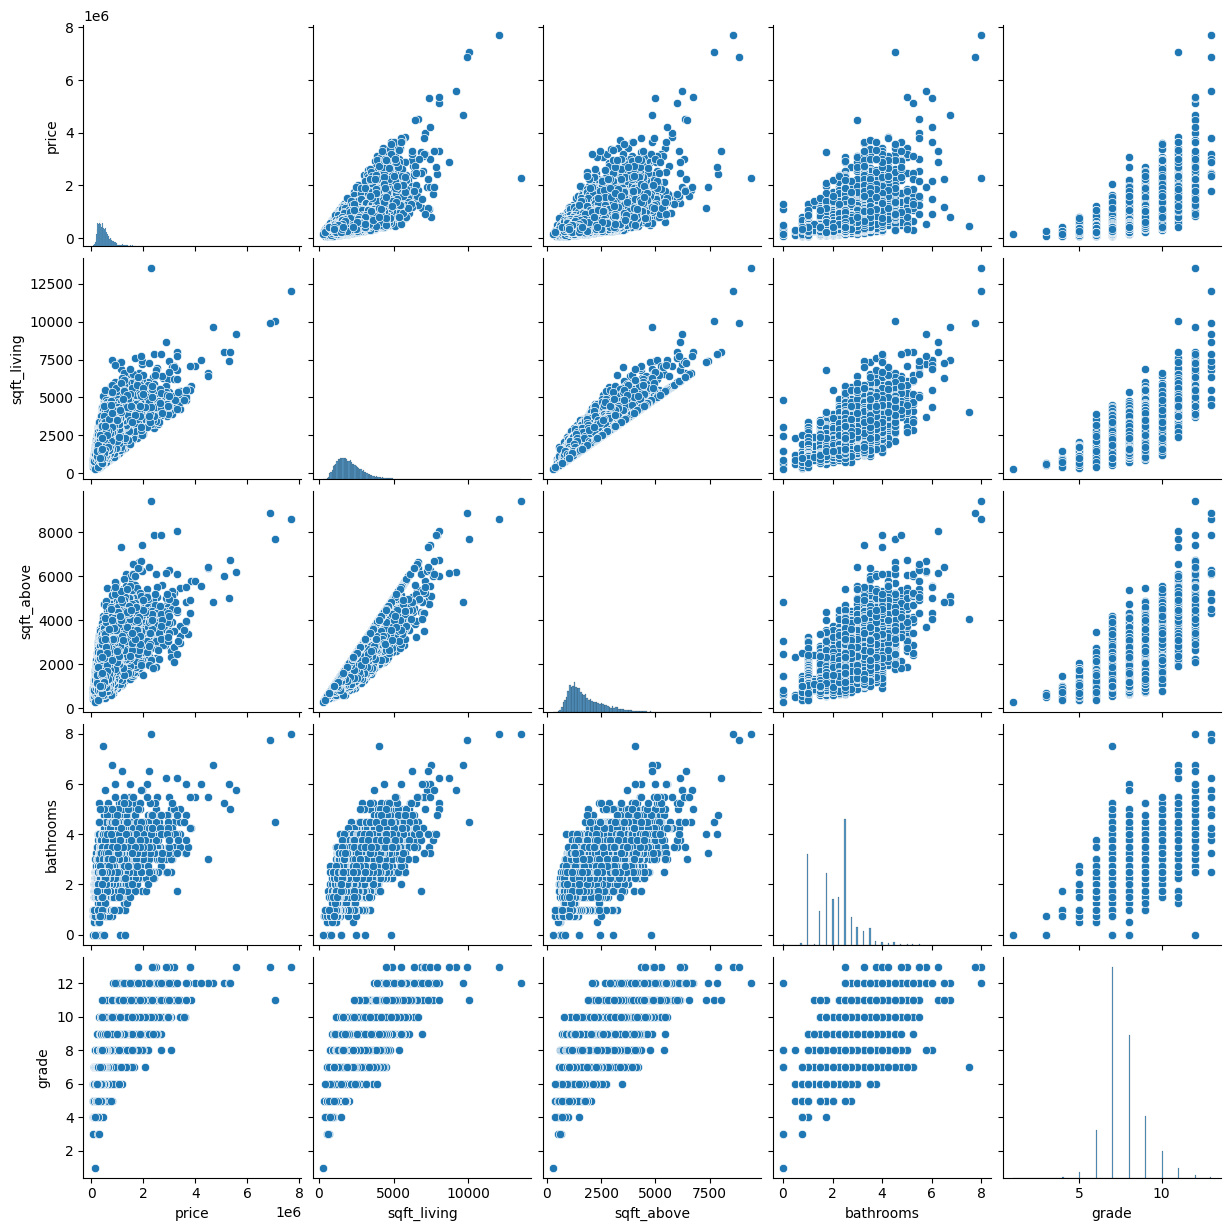

In [ ]:
# Visualización de las relaciones entre las variables con mayor correlación respecto al precio
sns.pairplot(df[['price', 'sqft_living', 'sqft_above', 'bathrooms', 'grade']])
plt.show()

**Observación:** Las columnas 'sqft_living' y 'sqft_above' están fuertemente correlacionadas, lo que podría generar un problema de multicolinealidad y afectar el rendimiento de los modelos. Para evitar esto, sumaremos ambas columnas y luego las eliminaremos.

In [ ]:
# Sumar las columnas 'sqft_living' y 'sqft_above' para evitar multicolinialidad
df_clean['total_sqft'] = df_clean['sqft_living'] + df_clean['sqft_above']

# Eliminar las columnas 'sqft_living' y 'sqft_above'
df_clean.drop(['sqft_living', 'sqft_above'], axis=1, inplace=True)

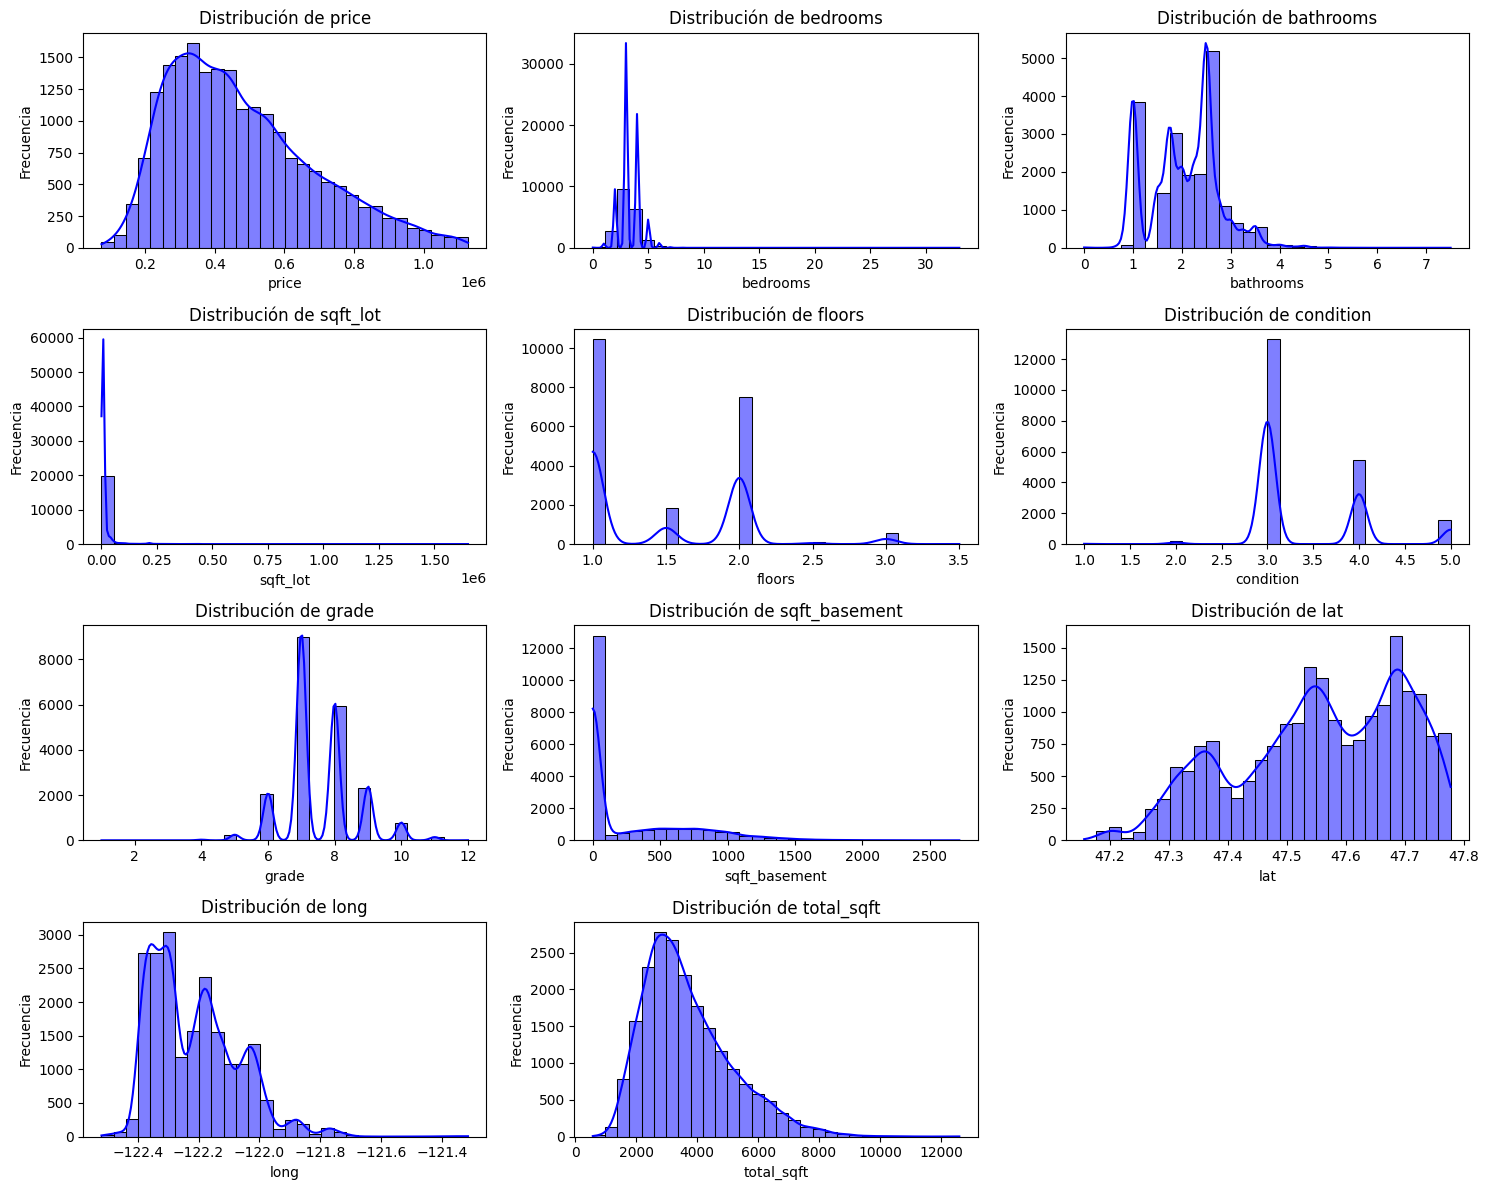

In [ ]:
# Distribución de las variables
plt.figure(figsize=(15, 12))
for i, columna in enumerate(df_clean.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_clean[columna], kde=True, bins=30, color="blue")
    plt.title(f"Distribución de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

### Interpretación del análisis exploratorio de datos:

El conjunto de datos consta de **21,613 instancias** y **11 atributos** relacionados con las características de las viviendas. Entre los atributos se incluyen variables como 'bedrooms' (número de habitaciones), 'bathrooms' (número de baños), 'sqft_living' (superficie habitable en pies cuadrados), 'sqft_lot' (tamaño del terreno en pies cuadrados), 'floors' (número de pisos), 'condition' (condición general de la vivienda), 'grade' (calificación de la vivienda basada en el sistema del condado de King), 'sqft_above' (superficie habitable sobre el nivel del suelo), 'sqft_basement' (superficie del sótano), 'lat' (coordenada de latitud) y 'long' (coordenada de longitud). Los tipos de datos asociados son principalmente **int64** para variables como 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'condition' y 'grade', y **float64** para 'bathrooms', 'floors', 'lat' y 'long'. Esta estructura de atributos proporciona una base sólida para analizar las características de las viviendas y su relación con el precio. Además, no se encontraron **valores nulos** en el conjunto de datos.

En cuanto a la variable objetivo **'price'**, las estadísticas descriptivas muestran una media de aproximadamente **540,088** con una desviación estándar de **367,127**, lo que indica una alta variabilidad en los precios. El valor mínimo es **75,000**, mientras que el máximo alcanza **7,700,000**. El análisis de correlación entre 'price' y las variables numéricas reveló correlaciones positivas significativas con **'sqft_living' (0.70)**, **'grade' (0.67)**, **'sqft_above' (0.61)** y **'bathrooms' (0.53)**, lo que sugiere que a medida que aumentan la superficie habitable, la calidad de la construcción, el tamaño habitable sobre el nivel del suelo y el número de baños, el precio tiende a incrementarse.

El **histograma** de 'price' mostró una distribución sesgada hacia la izquierda, con algunos valores atípicos por encima de **$2,000,000**. Para abordar estos valores atípicos, se utilizó el **método del Rango Intercuartílico (IQR)**, lo que permitió limpiar el conjunto de datos y mejorar la representatividad de la distribución de precios más comunes. Como resultado de este proceso, el número de instancias se redujo de **21,613** a **20,467**. El **boxplot** confirmó que la mayoría de las viviendas se encuentran dentro de un rango de precios moderado, aunque algunas propiedades de lujo están significativamente por encima de este rango. A través del **mapa de correlación**, se observó una fuerte relación entre 'sqft_living' y 'sqft_above'. Luego, se realizó un **pairplot** para visualizar las relaciones entre las variables más importantes, como es el caso de 'sqft_living' y 'sqft_above'. Esto motivó la creación de una nueva variable denominada **'total_sqft'** para abordar la multicolinealidad.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [ ]:
# Dividir el DataFrame en características (features) y variable objetivo (target)
X = df_clean.drop(['price'],axis=1).values
y = df_clean['price'].values

## División del dataset en datos de entrenamiento y datos de test

In [ ]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Propuesta de arquitectura de red neuronal

Describe:

+ las neuronas en la capa de entrada
+ las capas intermedias – al menos dos –
+ capa de salida
+ funciones de activación

In [ ]:
# Código de la estructuración de la red
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Construir el modelo
modelo = Sequential()
modelo.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelo.add(Dense(32, activation='relu'))
modelo.add(Dense(1))

# Compilar el modelo
modelo.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
#Código de la inspección del modelo de red
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

**Preprocesamiento del dataset y transformaciones previas necesarias para la modelación:**

Los datos fueron escalados utilizando **StandardScaler**, lo que permitió que todas las características tuvieran la misma magnitud, mejorando la eficacia de la red neuronal al reducir posibles sesgos derivados de diferencias de escala.

**División del dataset en datos de entrenamiento y datos de test:**
- La división en conjuntos de entrenamiento y prueba (80%-20%) permitió validar el modelo en datos no vistos, asegurando que el modelo tenga una capacidad real de generalización.

**Propuesta de arquitectura de red neuronal:**
- La red neuronal propuesta cuenta con dos capas ocultas, utilizando **funciones de activación ReLU**. Esto permite que el modelo capture relaciones no lineales y aprenda de manera eficiente patrones complejos en los datos.
- La capa de salida tiene una única neurona, sin activación, ya que es un problema de **regresión**, donde el objetivo es predecir un valor continuo: el precio de la vivienda.
- La compilación del modelo con el optimizador **'adam'** y la función de pérdida **error cuadrático medio (MSE)** es adecuada para un problema de regresión, mientras que la métrica **error absoluto medio (MAE)** proporciona una interpretación clara sobre el rendimiento del modelo.

##  Ajuste de modelo de Regresión RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [ ]:
# Código de ajuste y entrenamiento
history = modelo.fit(X_train_scaled, y_train, batch_size=32, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 273873403904.0000 - mae: 478925.2500 - val_loss: 273742561280.0000 - val_mae: 479481.9375
Epoch 2/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 265317613568.0000 - mae: 472513.8438 - val_loss: 263262011392.0000 - val_mae: 470416.2188
Epoch 3/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 254404444160.0000 - mae: 462226.6875 - val_loss: 238683045888.0000 - val_mae: 448241.9688
Epoch 4/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 226727804928.0000 - mae: 436902.5000 - val_loss: 201192865792.0000 - val_mae: 411200.5312
Epoch 5/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 189217325056.0000 - mae: 396656.1875 - val_loss: 156515074048.0000 - val_mae: 359795.7812
Epoch 6/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 147729989632.0000 - mae: 346120.8750 - val_loss: 113891622912.0000 - val_mae: 298979.3438
Epoch 7/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 105929236480.0000 - mae: 284174.0000 - v

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


In [ ]:
# Evaluar en el conjunto de prueba
red_evaluada = modelo.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss: {red_evaluada[0]}, MAE: {red_evaluada[1]}")

Loss: 15177350144.0, MAE: 91903.1015625


### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

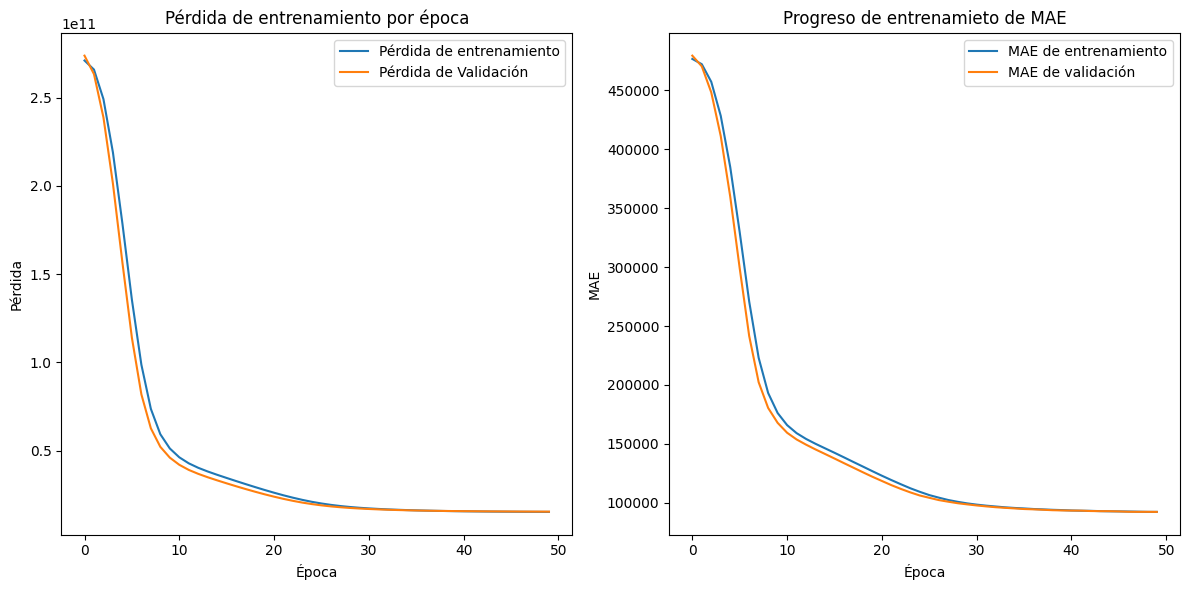

In [ ]:
#Código de evaluación de la red propuesta (entrenamiento y validación)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title("Pérdida de entrenamiento por época")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.title("Progreso de entrenamieto de MAE")
plt.xlabel("Época")
plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()

### Interpretación de los resultados mostrados en las dos gráficas:

**Pérdida de entrenamiento por época**
- **Comportamiento:**
  - La pérdida de entrenamiento y la pérdida de validación disminuyen progresivamente con el número de épocas.
  - Ambas curvas convergen y se estabilizan a partir de las últimas épocas, indicando que el modelo logra un ajuste razonable sin signos claros de sobreajuste.

- **Interpretación:**
  - Una pérdida menor indica que el modelo está aprendiendo a predecir correctamente el resultado a medida que avanza el entrenamiento.
  - La cercanía entre la pérdida de entrenamiento y la de validación sugiere que el modelo no está sufriendo problemas de sobreajuste ni subajuste, lo que es un buen indicador de generalización.

**Progreso de entrenamiento de MAE (Error Absoluto Medio)**
- **Comportamiento:**
  - Tanto el MAE de entrenamiento como el MAE de validación disminuyen de manera drástica en las primeras épocas, y luego se estabilizan a medida que avanza el entrenamiento.
  - Las curvas son similares y se aproximan a un valor bajo, indicando que el error medio en las predicciones del modelo disminuye significativamente.

- **Interpretación:**
  - Un MAE bajo indica que el modelo realiza predicciones precisas en promedio.
  - La similitud entre el MAE de entrenamiento y validación también sugiere que el modelo está equilibrado y no está aprendiendo únicamente los datos de entrenamiento.

### Evalúe los resultados  para el conjunto de test.

In [ ]:
# Código de evaluación de la red propuesta (evaluación conjunto de test)
y_pred_test = modelo.predict(X_test_scaled)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


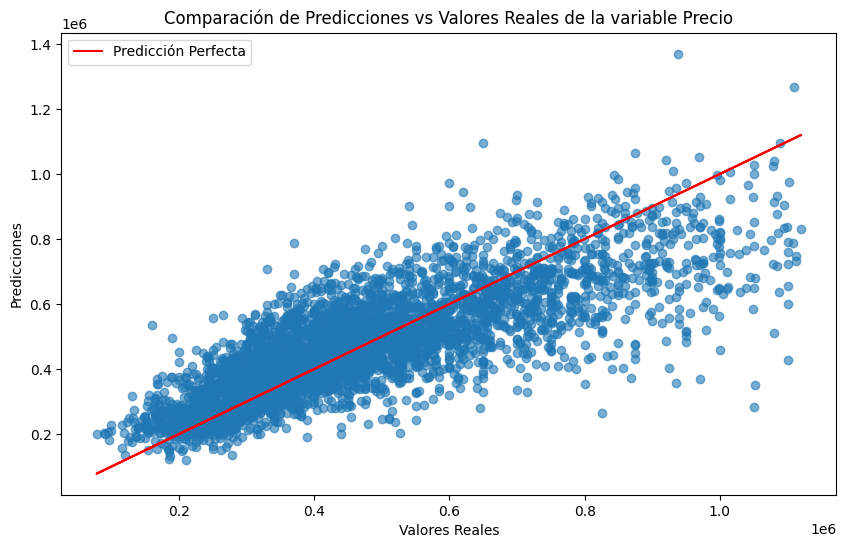

In [ ]:
# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot(y_test,y_test, color='red', label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales de la variable Precio')
plt.legend()
plt.show()

### Interpretación de los resultados:

La gráfica muestra que las predicciones del modelo están alineadas con los valores reales, lo que indica un buen desempeño general. Los puntos se distribuyen principalmente cerca de la línea de predicción perfecta, evidenciando una correlación positiva entre los valores predichos y los reales. Sin embargo, existe cierta dispersión en los extremos, especialmente en los valores más altos, lo que sugiere que el modelo tiene margen de mejora en estos casos.


## Ajuste de modelos de Regresión alternativos

Elige al menos un método de regresión no basado en redes neuronales (p.ej. regresión lineal, regresión polinómica, regresión logarítmica, SVR, random forest regression, etc.).

In [ ]:
#Código de ajuste del modelo 1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

In [ ]:
#Código de ajuste del modelo 2
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf = rf_reg.predict(X_test_scaled)

In [ ]:
#Código para mostrar la evaluación de los modelos

# Evaluación de la regresión lineal
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Regresión Lineal - MSE: {mse_lr}, R2: {r2_lr}")

# Evaluación de Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regression - MSE: {mse_rf}, R2: {r2_rf}")

Regresión Lineal - MSE: 15540765270.787827, R2: 0.6268190706141605
Random Forest Regression - MSE: 6391698674.192102, R2: 0.8465159205465351


Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

### Interpretación del ajuste de Modelos de Regresión Alternativos:

En el análisis de los resultados obtenidos de los modelos de **regresión lineal** y **Random Forest Regression**, se destacan diferencias clave en el rendimiento de ambos.

La **regresión lineal** presentó un **MSE (Error Cuadrático Medio)** de **15,540,765,270.79** y un **R² de 0.63**, lo que indica que aproximadamente el **63% de la variabilidad** en los precios de las viviendas puede ser explicada por el modelo. Sin embargo, a pesar de tener un desempeño razonable, la capacidad predictiva del modelo es limitada, ya que una parte significativa de la variabilidad en los datos no es explicada por las relaciones lineales asumidas en este modelo.

Por otro lado, el modelo de **Random Forest Regression** mostró un **MSE** mucho más bajo de **6,391,698,674.19** y un **R² de 0.85**, lo que sugiere una mejora notable en la capacidad de predicción. Con un **R² de 0.85**, el modelo es capaz de explicar el **85% de la variabilidad** en los precios de las viviendas, lo que representa una mejora significativa respecto a la regresión lineal. Este aumento en el desempeño puede atribuirse a la capacidad del modelo de **Random Forest Regression** para capturar relaciones no lineales y manejar interacciones complejas entre los atributos, lo que lo hace más adecuado para este tipo de datos en comparación con el modelo lineal más sencillo.

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [ ]:
# Crear un DataFrame para comparar los resultados de las métricas
resultados = {
    "Modelo": ["Red Neuronal", "Regresión Lineal", "Random Forest Regression"],
    "MSE": [red_evaluada[0], mse_lr, mse_rf],
}
df_resultados = pd.DataFrame(resultados)

# Mostrar la tabla de comparación
df_resultados

,Modelo,MSE
0,Red Neuronal,1.517735e+10
1,Regresión Lineal,1.554077e+10
2,Random Forest Regression,6.391699e+09


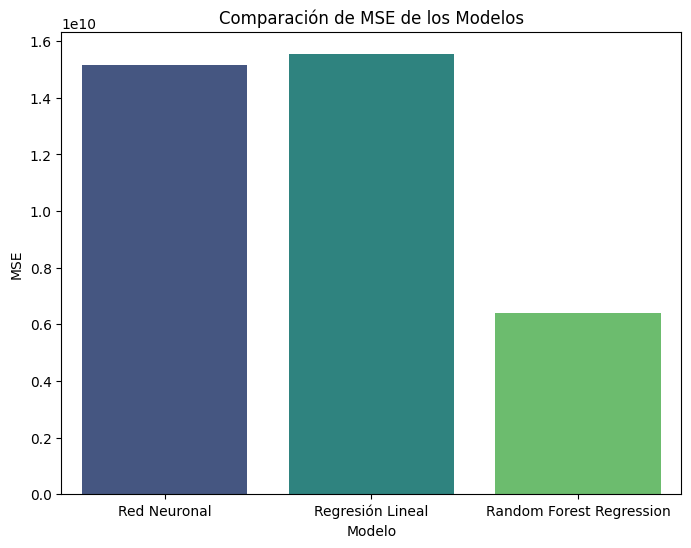

In [ ]:
# Comparación de métricas del desempeño de los modelos
plt.figure(figsize=(8, 6))
sns.barplot(data=df_resultados, x='Modelo', y='MSE', palette='viridis')

# Añadir título y etiquetas
plt.title("Comparación de MSE de los Modelos")
plt.ylabel("MSE")
plt.xlabel("Modelo")

# Mostrar el gráfico
plt.show()

Construya un párrafo con los principales hallazgos.

### Principales Hallazgos
- **Red Neuronal** tiene un MSE de **1.52e+10** y un MAE competitivo según las gráficas de error absoluto, pero su precisión es menor que la de Random Forest Regression, especialmente en valores extremos.
- **Regresión Lineal** es la menos precisa, con un MSE de **1.55e+10**, lo que refleja su incapacidad para modelar relaciones no lineales y depender exclusivamente de relaciones lineales entre las variables.
- **Random Forest Regression** obtiene el mejor desempeño con un MSE de **6.39e+09** y muestra gran capacidad para modelar relaciones no lineales de los datos, siendo el modelo más preciso en este análisis.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo:
+ Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas.
+ Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido
+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.

### Resultados comparados. Conclusiones objetivas y significantes con base en las diferentes métricas escogidas:

La Red Neuronal presenta un desempeño aceptable, pero su **MSE** es más alto que el de **Random Forest Regression**, lo que indica que no está tan optimizada en comparación con este último. Por otro lado, la **Regresión Lineal** muestra limitaciones para modelar relaciones no lineales o interacciones complejas, como se evidencia en su R² de 0.63, lo que refleja su incapacidad para abordar adecuadamente patrones complejos en los datos. En resumen, el modelo **Random Forest Regression** supera a la **Red Neuronal** y a la **Regresión Lineal** debido a su mejor capacidad para manejar relaciones complejas y no lineales, como lo refleja su alto R² de 0.85.

### Argumentos que describen con qué técnica se obtienen mejores resultados en base a las diferentes métricas elegidas:

En cuanto a las métricas adicionales, los resultados de los modelos son los siguientes:

- **Red Neuronal**: Presenta un **MAE** de 92,153.86, lo que indica un error promedio relativamente bajo en la predicción de precios, sugiriendo que el modelo realiza un buen proceso de aprendizaje, ya que su error se estabiliza después de una rápida disminución inicial.
- **Regresión Lineal**: Tiene un **R²** de 0.63, lo que significa que puede explicar el 63% de la variabilidad de los precios de las viviendas. Sin embargo, este modelo no logra capturar el 37% restante, lo que indica sus limitaciones al tratar de modelar relaciones no lineales o interacciones complejas que podrían ser relevantes para los datos.
- **Random Forest Regression**: Exhibe un **R²** de 0.85, lo que es significativamente más alto que el de la regresión lineal. Este modelo demuestra una capacidad superior para modelar relaciones complejas y no lineales entre las variables, lo que explica su mejor desempeño general en comparación con los otros modelos.

### Para mejorar el rendimiento de una red neuronal, se pueden aplicar las siguientes estrategias:
- **Optimización de hiperparámetros**: Ajustar la tasa de aprendizaje, el número de épocas y el tamaño de los lotes es crucial para mejorar el desempeño de la red neuronal. Se pueden utilizar optimizadores como **RMSprop** para encontrar la combinación más eficiente que reduzca el error de predicción.
- **Aumentar la complejidad del modelo**: Incrementar el número de capas o neuronas en la red puede permitir que el modelo capture patrones más complejos en los datos, lo que podría mejorar el desempeño en tareas que involucren relaciones no lineales o características interdependientes entre las variables.
- **Regularización**: Implementar técnicas como **Dropout** o regularización L2 puede prevenir el sobreajuste y mejorar la capacidad de generalización del modelo. Esto es especialmente útil cuando se entrenan redes neuronales con grandes cantidades de datos.  
- **Validación cruzada**: Implementar validación cruzada es crucial para evaluar de manera más precisa la capacidad de generalización del modelo, ya que garantiza que el modelo no esté sobreajustado a los datos de entrenamiento y que se desempeñe bien con datos no vistos.

